In [276]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [277]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'
!wget $data

df = pd.read_csv(data)
len(df)

--2024-10-02 18:07:03--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2024-10-02 18:07:03 (104 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



11914

In [278]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [279]:
#Cleaning
#Format columns names _ for consistency, make them strings, make lc
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

#find all types of columns
df.dtypes 

#only retreive object / string
df.dtypes[df.dtypes =='object']

#get index
strings = list(df.dtypes[df.dtypes =='object'].index)



In [280]:
#clean values in string columns 
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [281]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [282]:
# 2.3   Exploratory data analysis
#iterate over columns and print statistics
#col names, unique values, first 5 unique values, count of unique values
for col in df.columns:
    print(col)
    print(df[col].head())
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64
[2011 2012 2013 1992 1993]
28

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64
[335. 300. 230. 320. 172.]
356

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64
[ 6.  4.  

In [283]:
import  matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<Axes: xlabel='msrp', ylabel='Count'>

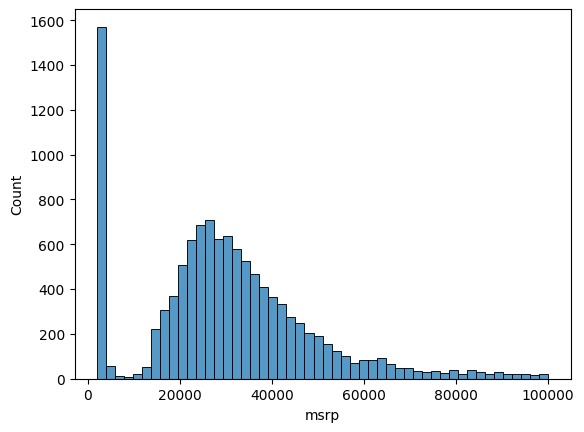

In [284]:
#see distribution of prices
#sns.histplot(df.msrp, bins=50) #bins = bars  1e6

#most cars are cheap. adjust binning. long-tail distribution.
sns.histplot(df.msrp[df.msrp < 100000], bins=50) 
#^ view only msrp less than 100000 to "zoom in"
#long tail will confuse mL algoritm

In [285]:
import numpy as np

In [286]:
#apply logorythm to elminate long-tail confusion for ml
#np.log([0, 1, 10, 1000, 100000])
#^can't divide by 0 , add 1 to alleiviate negative problems. 
#np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

#use numpy shortcut! below:
np.log1p([0, 1, 10, 1000, 100000])


array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

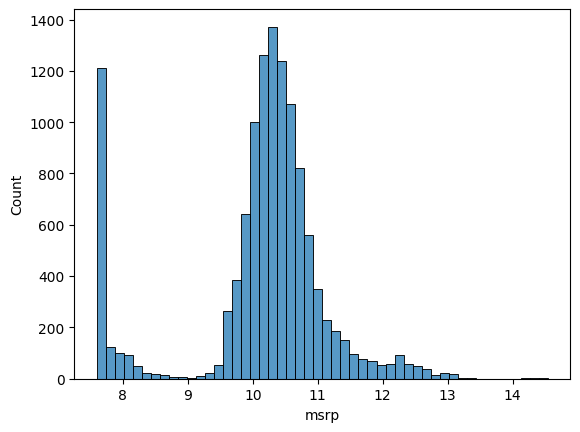

In [287]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)
#^ normal distribution, bell-curve. zzs

In [288]:
#look at missing values, count by column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

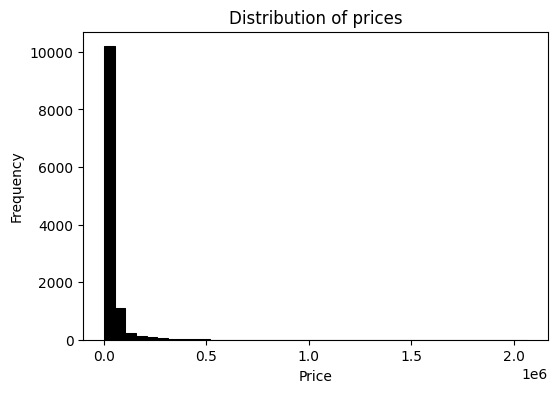

In [289]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

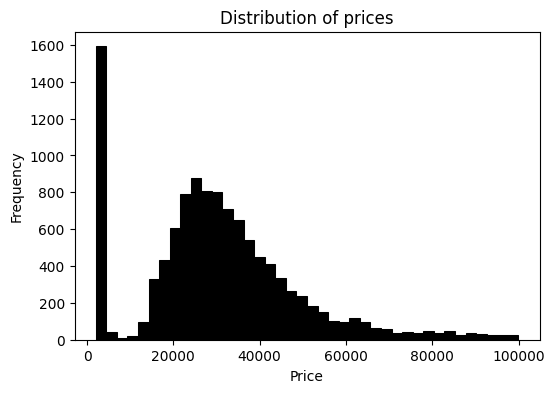

In [290]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

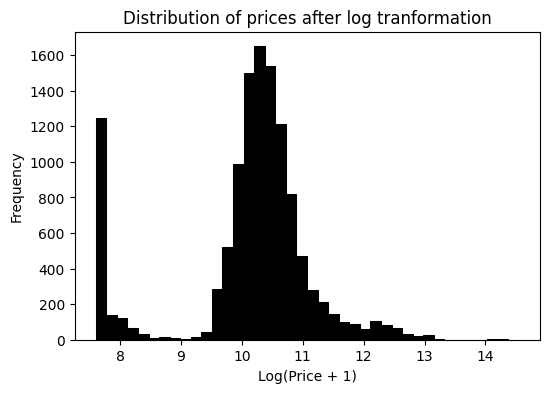

In [291]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [292]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Validation framework

In [293]:
#Train, Validate, Test     <---different dfs 
#X1 y1, Xv yv,   Xtest ytest
#60%    20%      20%

In [294]:
#sixe of df as integer
#(len(df)*0.2)
n = len(df)

#defining the percentage of n taken for each df
n_val = int(0.2 * n)
n_test = int(0.2 * n)
#making sure n_train is the remaining %
#n_train = n - n_val - n_test
n_train = n - (n_val + n_test)

In [295]:
n

11914

In [296]:
#view size of each df
n_val, n_test, n_train

(2382, 2382, 7150)

In [297]:
#use range
# df.iloc[:10]
# df.iloc[5:10]
# df.iloc[11910:]
#df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [300]:
idx = np.arange(n)

#shuffle index
#set random seed to make reproducable
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
df_shuffled = df.iloc[idx]

In [ ]:
#with shuffle
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [298]:
#Using iloc to slice new dfs from df 
# #first n_val rows
# df_val = df.iloc[:n_val]
# #contains the next n_val rows
# df_test = df.iloc[n_val:n_val+n_test]
# #contains the remaining rows after what just preceeded
# df_train = df.iloc[n_val+n_test]

#len(df_train), len(df_val), len(df_test)

In [299]:
#need to rearrange values to remove accidental order
# df_train = df.iloc[:n_train] #! incorrect in video. this is corrected.
# df_val = df.iloc[n_train:n_train+n_val]
# df_test = df.iloc[n_train+n_val:]

In [301]:
#update df with shuffled indices
# df_train = df.iloc[idx[:n_train]]
# df_val = df.iloc[idx[n_train:n_train+n_val]]
# df_test = df.iloc[idx[n_train+n_val:]]

In [302]:
df_train.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [303]:
#show len of each df
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [304]:
#GOING FORWARD
#reset index column to reset dfs to go forward
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [ ]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

In [305]:
#set up y dfs   #just correcting this! 
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [306]:
#df using iloc to get the different dfs
# df_val = df.iloc[:n_val]
# df_test = df.iloc[n_val:n_val+n_test]
# df_train = df.iloc[n_val+n_test]

In [307]:
#remove msrp from dfs so that we don't use this data! 
#don't want target variable in the dataframe !!!
#do this after separating the data x from y 
#this impacts the named df. 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


In [308]:
#only after dropping 'msrp' from the above can we get the 
#correct len for our y sets
len(y_train)

7150

## 2.5 Linear Regression
## woot


In [309]:
#regression problems - predicting numbers
#g(X) ~= y
#g = model & linear regression
#X = feature matrix <- training set
#y = price

In [310]:
#g(xi) ~= Yi
#x = a car
#Y = the price of that specific car

#xi = (xi1, xi2, etc)

#need function that takes this all in and produces price
#g(xi1, etc) ~= Yi


In [311]:
#inspect row 10 of training set
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [312]:
xi = [453, 11, 86] #hp, mpg, pop
# this is ONE VECTOR linear regression

#need to combine these variables for the value so that it can be input for Yi

#g(xi) = Wo + (W1*xi1 + W2*xi2 + W3*xi3 etc) 
#W is weight, different weight per variable
#W0 is bias term or what we want to predict

#replace addition with sum by def below.

In [313]:
w0 = 7.17 #bias term
#will cover how weights are determined later
w = [0.01, 0.04, 0.002]

In [314]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [315]:
linear_regression(xi)

12.312

### VOILA. Barebones Linear Regression ^^^^

In [316]:
#need to do predicted msrp from outputted xi
#np.log(12.312) -1
#or
np.expm1(12.312)
#if do np.expm1(xi) an array is returned

np.float64(222347.2221101062)

In [317]:
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear Regression - Vector Form

In [318]:
#review: 
#g(xi) = Wo + (W1*xi1 + W2*xi2 + W3*xi3 etc) 
#W is weight, different weight per variable
#W0 is bias term or what we want to predict

In [319]:
#inserting dot() to inform linear_regression()
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [320]:
#first LR, now modified
def linear_regression(xi):
    return w0 + dot(xi, w)

In [321]:
#hypothetically, let Xi0 = 1 
#w = [w array] 
#xi = [xi array]

In [322]:
#new weight
w_new = [w0] + w

In [323]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [324]:
#do same with xi
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [325]:
linear_regression(xi)

12.312

In [326]:
#***^^^^^^^^^^ two ways of doing the same thing, 
#should have gotten same numeric result.....

In [327]:
#doing a matrix version.  multiple rows
#for each row, need to multiply by respective weight
#output is prediction (Y)
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

#format for array is 1 and the three variables
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

#lists of lists into array
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [328]:
#apply LR to this array
def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

In [329]:
#how to set weights? covered next. 

## 2.7 Training a Linear Regression Model
## see 02-regression.ipynb as well. 
## this is re-continued bc of lesson 2.8 baseline model

In [330]:
#(g(X) = X*w) ~= Y
#often exact Y is not possible
#solve for w 
# w = ( XT*X ) − 1X*Ty 
#  where XT*X is the Gram Matrix

#only square matricies can have an inverse! in cases where not square, apply Gram matrix.
#Elements of Statistical Learning  <- book for going further

In [331]:
import numpy as np

In [332]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [333]:
#bias term gives baseline if nothing else is known about what is being predicted
ones = np.ones(X.shape[0])   #creates based on no. of rows
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [334]:
#colum stack. stack two vectors tother
X = np.column_stack([ones, X])



In [335]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
#array of y matches number of rows in X

In [336]:
#gram matrix
XTX = X.T.dot(X)
#inverse
XTX_inv = np.linalg.inv(XTX)
#intersect
w_full = XTX_inv.dot(X.T).dot(y)

In [337]:
#parsing matrix for weight.  w0 is bias term
w0 = w_full[0]
w = w_full[1:]


In [338]:
w0, w
#negative weights deduct from weighting

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [339]:
#put it in a function :) 

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    #return bias term and then weights
    return w_full[0], w_full[1:]

In [340]:
train_linear_regression(X, y)
#^^ get linalg error. Singular matrix. 


LinAlgError: Singular matrix

## 2.8 Car Price baseline model

In [230]:
df_train

make                                  ford
model                                 flex
year                                  2016
engine_fuel_type          regular_unleaded
engine_hp                            287.0
engine_cylinders                       6.0
transmission_type                automatic
driven_wheels            front_wheel_drive
number_of_doors                        4.0
market_category      crossover,performance
vehicle_size                         large
vehicle_style                        wagon
highway_mpg                             23
city_mpg                                16
popularity                            5657
Name: 4764, dtype: object

In [231]:
#selected numeric cols
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

engine_hp           287.0
engine_cylinders      6.0
highway_mpg            23
city_mpg               16
popularity           5657
Name: 4764, dtype: object

In [232]:
#extract values 
X_train = df_train[base].values

In [233]:
#check NaNs & fill with 0
#df_train[base].isnull().sum()
X_train = df_train[base].fillna(0).values  #<- model can ignore these features
#not always the best way to deal with NaNs. - filling with 0 - 
#using 0 for practical purposes, here. can also fill with min values instead.


/tmp/ipykernel_5676/1940617164.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = df_train[base].fillna(0).values  #<- model can ignore these features


In [234]:
w0, w = train_linear_regression(X_train, y_train)

ValueError: shapes (2,5) and (7150,) not aligned: 5 (dim 1) != 7150 (dim 0)

In [164]:
y_pred = w0 + X_train.dot(w)

ValueError: shapes (5,) and (3,) not aligned: 5 (dim 0) != 3 (dim 0)

In [82]:
# def train_linear_regression(X, y):
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     XTX_inv = np.linalg.inv(XTX)
#     w = XTX_inv.dot(X.T).dot(y)

#     return w[0], w[1:]

In [236]:
#view with seaborn
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

NameError: name 'y_pred' is not defined